In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import ceil
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [2]:
# Загрузка данных из файла Excel
file_path = '/content/sample_data/ks_23.xlsx'
df = pd.read_excel(file_path)
df

wo_stop
0          figma, ui, английский, язык, ux, android, ios
1      английский, язык, amocrm, телефония, программи...
2      пользователь, пк, adobe, photoshop, грамотный,...
3      деловой, коммуникация, грамотность, поиск, инф...
4      linux, postgresql, sql, ms, sql, java, oracle,...
...                                                  ...
10484    кибербезопасность, информационный, безопасность
10485                                            асу, тп
10486  администрирование, сетевой, оборудование, наст...
10487  linux, ci/, cd, pipeline, k8s, okd, ocp, менто...
10488  работа, команда, креативность, творческий, мыш...

[10489 rows x 1 columns]

In [3]:
tfidf_vectorizer = TfidfVectorizer(min_df=15)  # Оставлены только термины, встречающиеся как минимум в 15 документах
tfidf_matrix = tfidf_vectorizer.fit_transform(df.iloc[:, 0].astype('U'))

print(tfidf_matrix.shape)

(10489, 740)


In [4]:
# Матрица терминов
terms = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
tfidf_df

10   1с  2003        24   3d  3ds   4d  abap  access  acrobat  ...  \
0      0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
1      0.0  0.0   0.0  0.482236  0.0  0.0  0.0   0.0     0.0      0.0  ...   
2      0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
3      0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
4      0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
...    ...  ...   ...       ...  ...  ...  ...   ...     ...      ...  ...   
10484  0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
10485  0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
10486  0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
10487  0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   
10488  0.0  0.0   0.0  0.000000  0.0  0.0  0.0   0.0     0.0      0.0  ...   

       цфт  человек  чувство  эдо  экономический  электронный  энергичность  \
0      0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
1      0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
2      0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
3      0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
4      0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
...    ...      ...      ...  ...            ...          ...           ...   
10484  0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
10485  0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
10486  0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
10487  0.0      0.0      0.0  0.0            0.0          0.0      0.000000   
10488  0.0      0.0      0.0  0.0            0.0          0.0      0.337248   

       эффективно      язык  яндекс  
0             0.0  0.311871     0.0  
1             0.0  0.302113     0.0  
2             0.0  0.000000     0.0  
3             0.0  0.000000     0.0  
4             0.0  0.000000     0.0  
...           ...       ...     ...  
10484         0.0  0.000000     0.0  
10485         0.0  0.000000     0.0  
10486         0.0  0.000000     0.0  
10487         0.0  0.000000     0.0  
10488         0.0  0.000000     0.0  

[10489 rows x 740 columns]

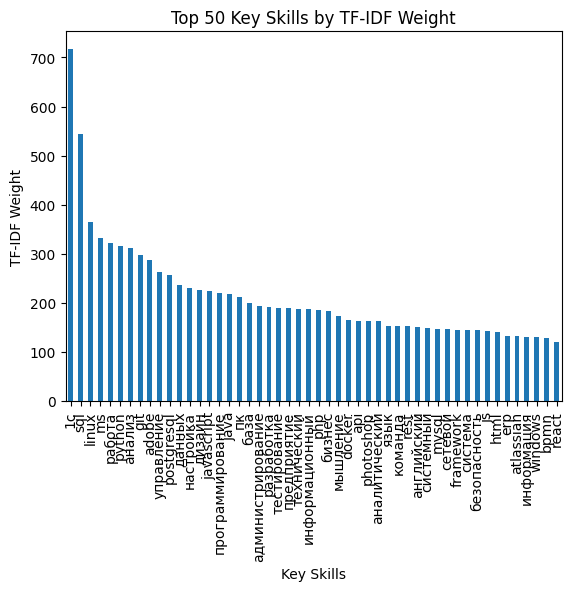

In [5]:
# Гистограмма наиболее часто встречающихся терминов
tfidf_df.sum().sort_values(ascending=False).head(50).plot(kind='bar')
plt.title('Top 50 Key Skills by TF-IDF Weight')
plt.xlabel('Key Skills')
plt.ylabel('TF-IDF Weight')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10489 samples in 0.008s...
[t-SNE] Computed neighbors for 10489 samples in 15.377s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10489
[t-SNE] Computed conditional probabilities for sample 2000 / 10489
[t-SNE] Computed conditional probabilities for sample 3000 / 10489
[t-SNE] Computed conditional probabilities for sample 4000 / 10489
[t-SNE] Computed conditional probabilities for sample 5000 / 10489
[t-SNE] Computed conditional probabilities for sample 6000 / 10489
[t-SNE] Computed conditional probabilities for sample 7000 / 10489
[t-SNE] Computed conditional probabilities for sample 8000 / 10489
[t-SNE] Computed conditional probabilities for sample 9000 / 10489
[t-SNE] Computed conditional probabilities for sample 10000 / 10489
[t-SNE] Computed conditional probabilities for sample 10489 / 10489
[t-SNE] Mean sigma: 0.378792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 2.112554
[t-SNE] KL

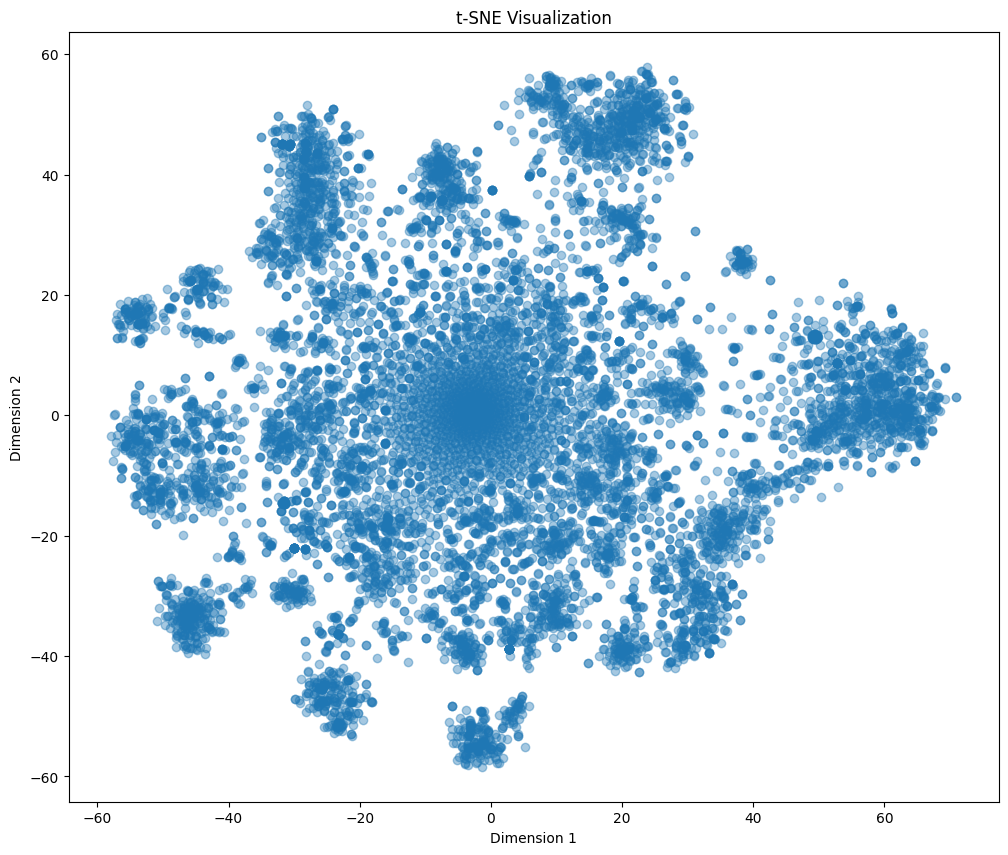

In [6]:
data_tfidf_sne = tfidf_df # Матрица терминов с весами tf-idf

# Модель t-SNE с 2 компонентами, параметры выбраны на базе исследования, согласно размеру выборки
tsne = TSNE(n_components=2, random_state=42, early_exaggeration = 1, verbose=1, perplexity=100, learning_rate=800, n_iter=1000)

data_tsne = tsne.fit_transform(data_tfidf_sne)

plt.figure(figsize=(12, 10))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.4)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [7]:
# Перебор числа кластеров от 5 до 40, предположение относительно разумной дифференциации профессиональных направлений
results_KM = []
for num_clusters in range(5, 41):

    kmeans_cluster = KMeans(n_clusters=num_clusters, random_state=42)
    print(f"Clustering in progress for {num_clusters} clusters...")
    kmeans_labels = kmeans_cluster.fit_predict(tfidf_df)
    print(f"Clustering completed for {num_clusters} clusters.")

    silhouette_avg_KM = silhouette_score(tfidf_df, kmeans_labels) # Рассчет SS

    davies_bouldin_KM = davies_bouldin_score(tfidf_df, kmeans_labels) # Рассчет DBI

    calinski_harabasz_KM = calinski_harabasz_score(tfidf_df, kmeans_labels) # Рассчет CHI

    results_KM.append([num_clusters, silhouette_avg_KM, davies_bouldin_KM, calinski_harabasz_KM]) # Сохранение результатов

results_df_KM = pd.DataFrame(results_KM, columns=['Num Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])

print(results_df_KM)


Clustering in progress for 5 clusters...
Clustering completed for 5 clusters.
Clustering in progress for 6 clusters...
Clustering completed for 6 clusters.
Clustering in progress for 7 clusters...
Clustering completed for 7 clusters.
Clustering in progress for 8 clusters...
Clustering completed for 8 clusters.
Clustering in progress for 9 clusters...
Clustering completed for 9 clusters.
Clustering in progress for 10 clusters...
Clustering completed for 10 clusters.
Clustering in progress for 11 clusters...
Clustering completed for 11 clusters.
Clustering in progress for 12 clusters...
Clustering completed for 12 clusters.
Clustering in progress for 13 clusters...
Clustering completed for 13 clusters.
Clustering in progress for 14 clusters...
Clustering completed for 14 clusters.
Clustering in progress for 15 clusters...
Clustering completed for 15 clusters.
Clustering in progress for 16 clusters...
Clustering completed for 16 clusters.
Clustering in progress for 17 clusters...
Clusteri

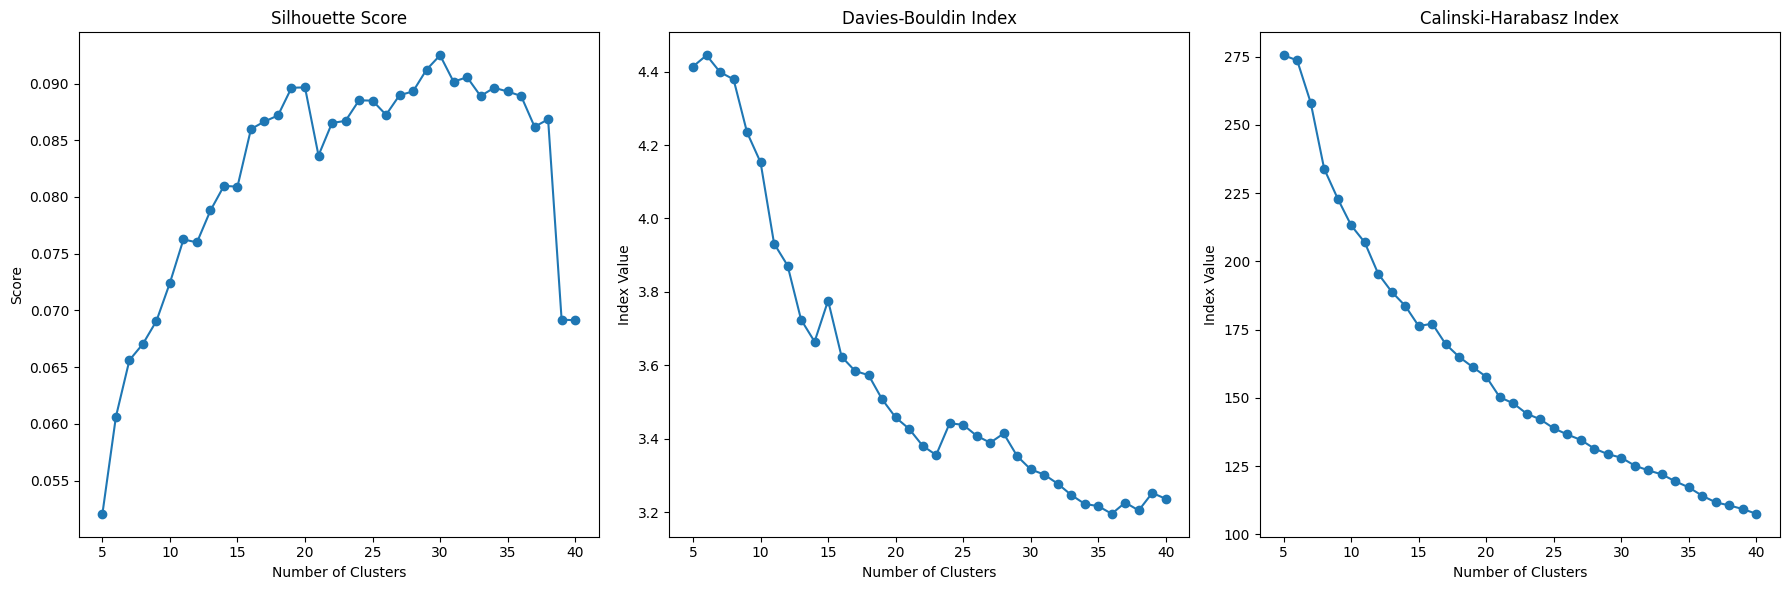

In [8]:
# Создание графиков для SS, DBI, CHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].plot(results_df_KM['Num Clusters'], results_df_KM['Silhouette Score'], marker='o')
axes[0].set_title('Silhouette Score')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Score')

axes[1].plot(results_df_KM['Num Clusters'], results_df_KM['Davies-Bouldin Index'], marker='o')
axes[1].set_title('Davies-Bouldin Index')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Index Value')

axes[2].plot(results_df_KM['Num Clusters'], results_df_KM['Calinski-Harabasz Index'], marker='o')
axes[2].set_title('Calinski-Harabasz Index')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Index Value')

plt.tight_layout()
plt.show()


In [9]:
# Перебор числа кластеров от 5 до 40, те же действия, что и для KM
results_HC = []
for num_clusters in range(5, 41):

    agglomerative_cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
    print(f"Clustering in progress for {num_clusters} clusters...")
    agglomerative_labels = agglomerative_cluster.fit_predict(tfidf_matrix.toarray())  # Преобразование в массив numpy
    print(f"Clustering completed for {num_clusters} clusters.")

    silhouette_avg_HC = silhouette_score(tfidf_matrix.toarray(), agglomerative_labels)

    davies_bouldin_HC = davies_bouldin_score(tfidf_matrix.toarray(), agglomerative_labels)

    calinski_harabasz_HC = calinski_harabasz_score(tfidf_matrix.toarray(), agglomerative_labels)

    results_HC.append([num_clusters, silhouette_avg_HC, davies_bouldin_HC, calinski_harabasz_HC])

results_df_HC = pd.DataFrame(results_HC, columns=['Num Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])

print(results_df_HC)


Clustering in progress for 5 clusters...
Clustering completed for 5 clusters.
Clustering in progress for 6 clusters...
Clustering completed for 6 clusters.
Clustering in progress for 7 clusters...
Clustering completed for 7 clusters.
Clustering in progress for 8 clusters...
Clustering completed for 8 clusters.
Clustering in progress for 9 clusters...
Clustering completed for 9 clusters.
Clustering in progress for 10 clusters...
Clustering completed for 10 clusters.
Clustering in progress for 11 clusters...
Clustering completed for 11 clusters.
Clustering in progress for 12 clusters...
Clustering completed for 12 clusters.
Clustering in progress for 13 clusters...
Clustering completed for 13 clusters.
Clustering in progress for 14 clusters...
Clustering completed for 14 clusters.
Clustering in progress for 15 clusters...
Clustering completed for 15 clusters.
Clustering in progress for 16 clusters...
Clustering completed for 16 clusters.
Clustering in progress for 17 clusters...
Clusteri

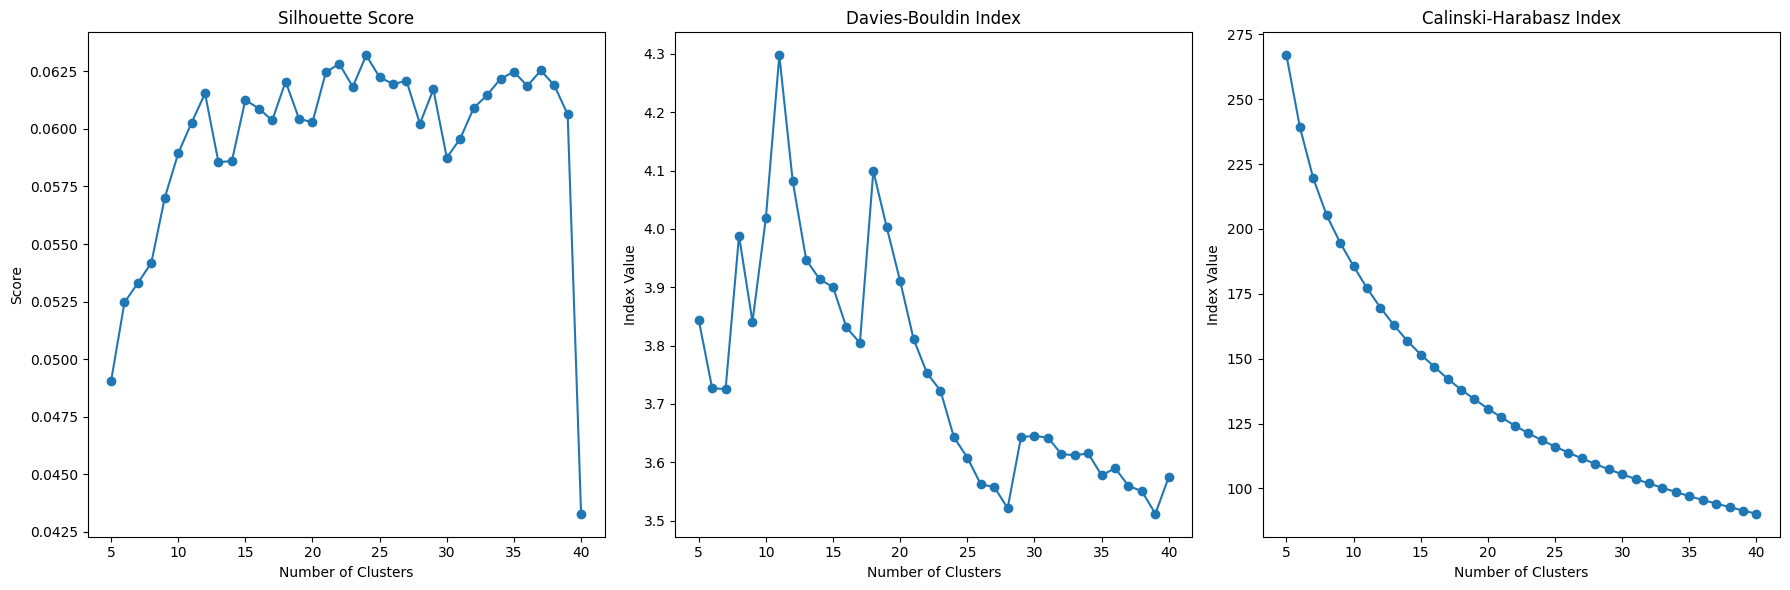

In [10]:
# Создание графиков для SS, DBI, CHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].plot(results_df_HC['Num Clusters'], results_df_HC['Silhouette Score'], marker='o')
axes[0].set_title('Silhouette Score')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Score')

axes[1].plot(results_df_HC['Num Clusters'], results_df_HC['Davies-Bouldin Index'], marker='o')
axes[1].set_title('Davies-Bouldin Index')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Index Value')

axes[2].plot(results_df_HC['Num Clusters'], results_df_HC['Calinski-Harabasz Index'], marker='o')
axes[2].set_title('Calinski-Harabasz Index')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Index Value')

plt.tight_layout()
plt.show()


In [11]:
# Перебор числа кластеров от 5 до 40
results_SC = []
for num_clusters in range(5, 41):

    spectral_cluster = SpectralClustering(n_clusters=num_clusters, random_state=42)
    print(f"Clustering in progress for {num_clusters} clusters...")
    spectral_labels = spectral_cluster.fit_predict(tfidf_df)
    print(f"Clustering completed for {num_clusters} clusters.")

    silhouette_avg_SC = silhouette_score(tfidf_df, spectral_labels)

    davies_bouldin_SC = davies_bouldin_score(tfidf_df, spectral_labels)

    calinski_harabasz_SC = calinski_harabasz_score(tfidf_df, spectral_labels)

    results_SC.append([num_clusters, silhouette_avg_SC, davies_bouldin_SC, calinski_harabasz_SC])

results_df_SC = pd.DataFrame(results_SC, columns=['Num Clusters', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])

print(results_df_SC)


Clustering in progress for 5 clusters...
Clustering completed for 5 clusters.
Clustering in progress for 6 clusters...
Clustering completed for 6 clusters.
Clustering in progress for 7 clusters...
Clustering completed for 7 clusters.
Clustering in progress for 8 clusters...
Clustering completed for 8 clusters.
Clustering in progress for 9 clusters...
Clustering completed for 9 clusters.
Clustering in progress for 10 clusters...
Clustering completed for 10 clusters.
Clustering in progress for 11 clusters...
Clustering completed for 11 clusters.
Clustering in progress for 12 clusters...
Clustering completed for 12 clusters.
Clustering in progress for 13 clusters...
Clustering completed for 13 clusters.
Clustering in progress for 14 clusters...
Clustering completed for 14 clusters.
Clustering in progress for 15 clusters...
Clustering completed for 15 clusters.
Clustering in progress for 16 clusters...
Clustering completed for 16 clusters.
Clustering in progress for 17 clusters...
Clusteri

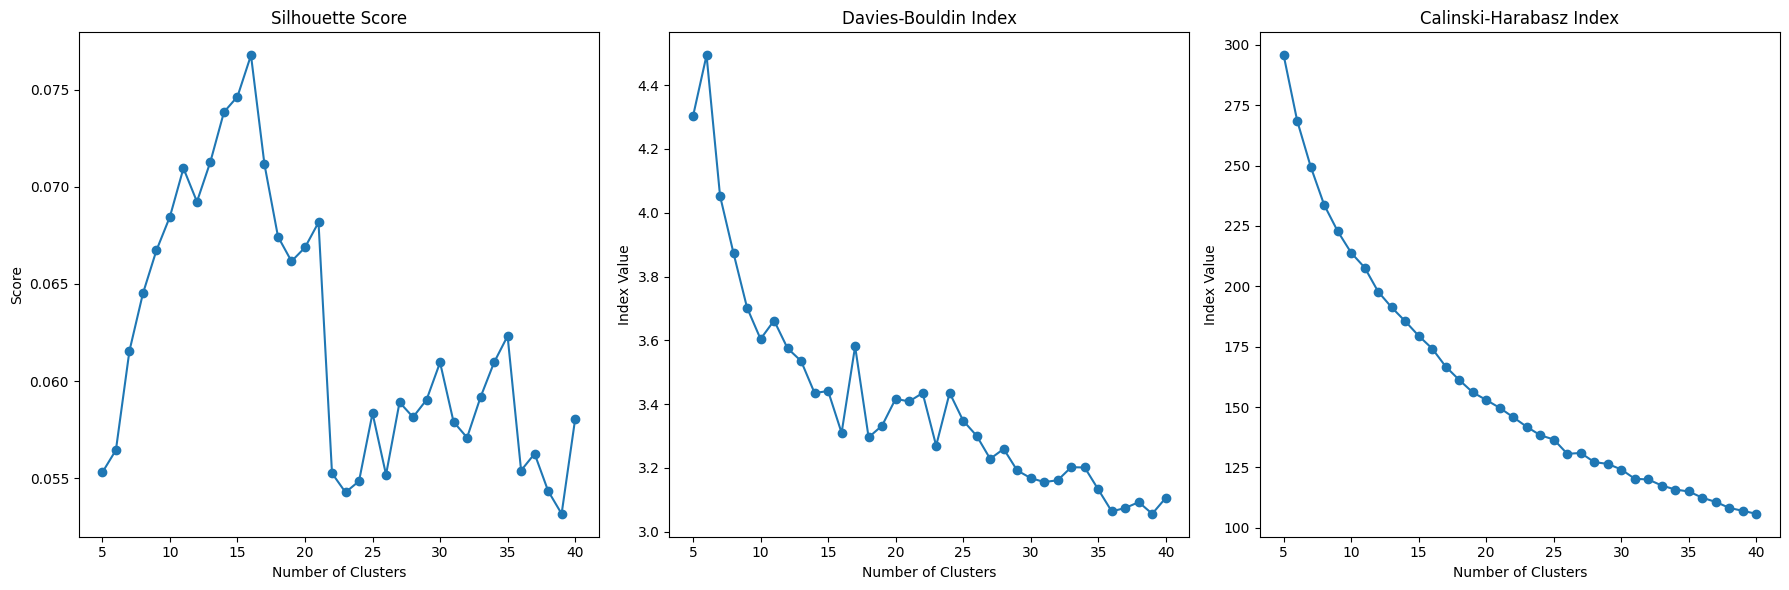

In [12]:
# Создание графиков для SS, DBI, CHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].plot(results_df_SC['Num Clusters'], results_df_SC['Silhouette Score'], marker='o')
axes[0].set_title('Silhouette Score')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Score')

axes[1].plot(results_df_SC['Num Clusters'], results_df_SC['Davies-Bouldin Index'], marker='o')
axes[1].set_title('Davies-Bouldin Index')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Index Value')

axes[2].plot(results_df_SC['Num Clusters'], results_df_SC['Calinski-Harabasz Index'], marker='o')
axes[2].set_title('Calinski-Harabasz Index')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Index Value')

plt.tight_layout()
plt.show()


In [14]:
# Определение оптимального числа кластеров на базе SS
from sklearn.preprocessing import MinMaxScaler

# Функция для нормализации метрики силуэта
def normalize_silhouette(df):
    scaler = MinMaxScaler()
    df['Silhouette Score'] = scaler.fit_transform(df[['Silhouette Score']])
    return df

# Нормализуем для каждой кластеризации
results_df_KM_norm = normalize_silhouette(results_df_KM.copy())
results_df_HC_norm = normalize_silhouette(results_df_HC.copy())
results_df_SC_norm = normalize_silhouette(results_df_SC.copy())

all_results = pd.concat([results_df_KM_norm, results_df_HC_norm, results_df_SC_norm])

optimal_clusters = all_results.groupby('Num Clusters')['Silhouette Score'].mean().idxmax()

print(f"Оптимальное число кластеров, основанное на метрике силуэта: {optimal_clusters}")


Оптимальное число кластеров, основанное на метрике силуэта: 16


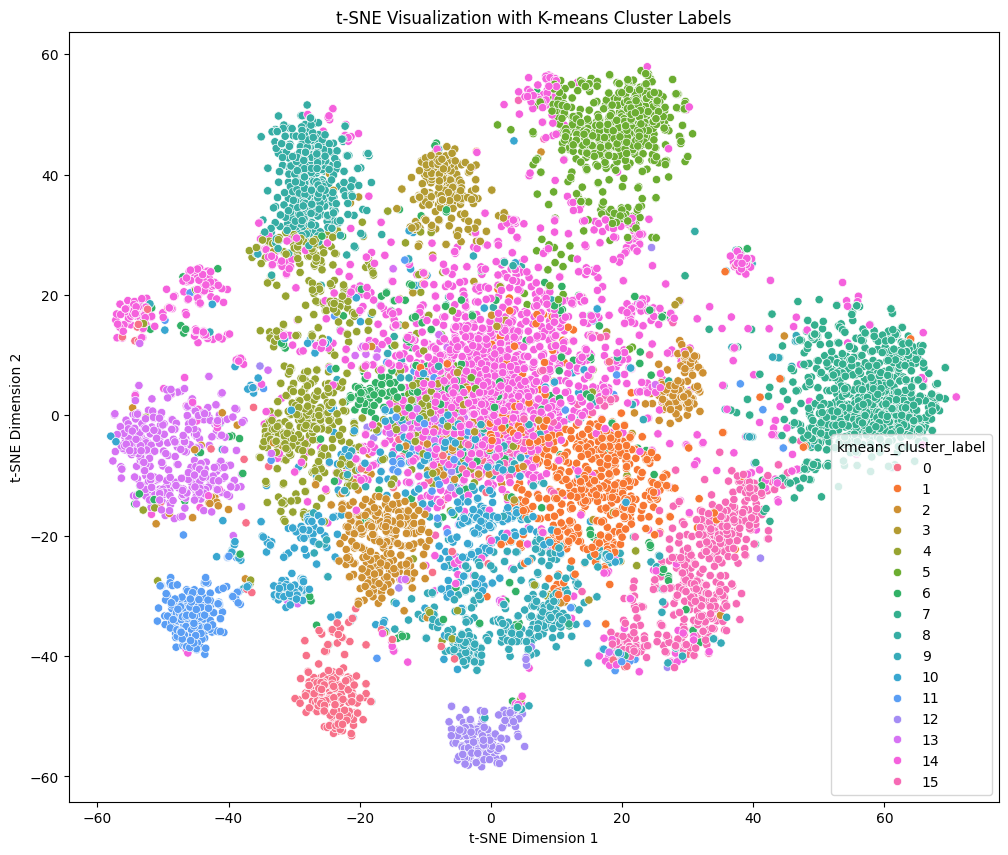

In [15]:
# Выполнение кластеризации и получение меток
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans_labels_16 = kmeans.fit_predict(tfidf_df)

# DF с результатами t-SNE и метками кластеров
tsne_df_kmeans = pd.DataFrame({
    'tsne_1': data_tsne[:, 0],
    'tsne_2': data_tsne[:, 1],
    'kmeans_cluster_label': kmeans_labels_16
})

custom_palette_kmeans = sns.color_palette("husl", 16)

plt.figure(figsize=(12, 10))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='kmeans_cluster_label', data=tsne_df_kmeans, palette=custom_palette_kmeans, legend='full')
plt.title('t-SNE Visualization with K-means Cluster Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


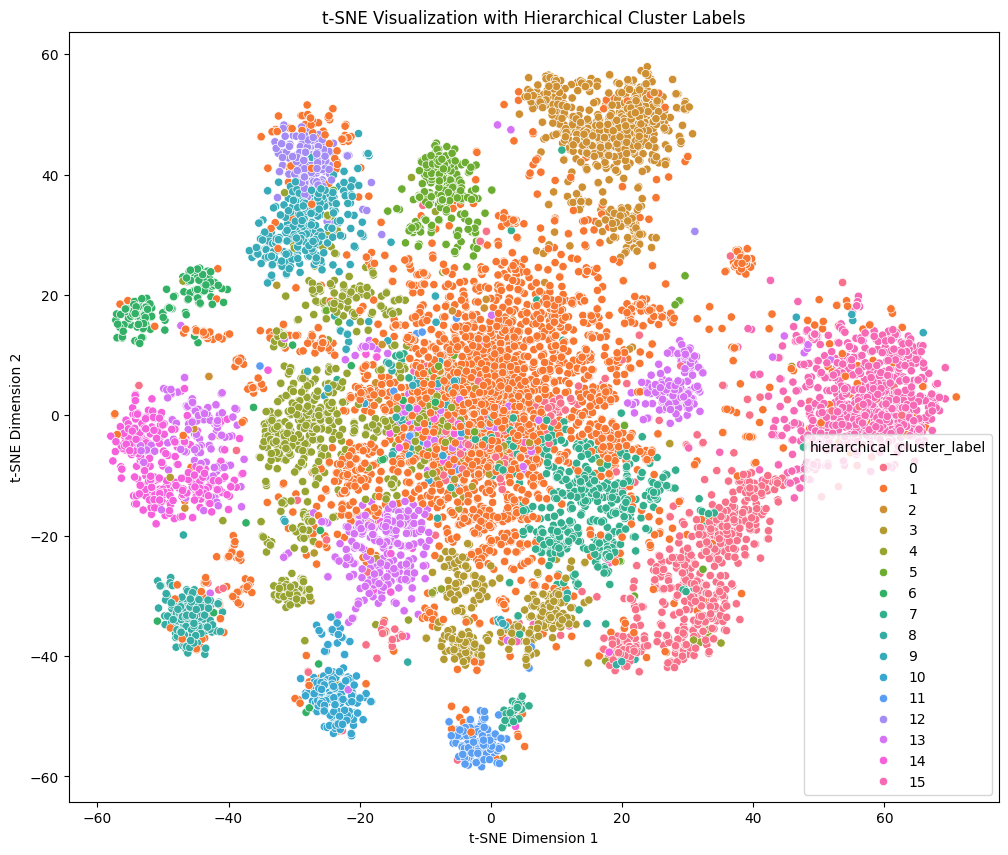

In [16]:
# Выполнение кластеризации и получение меток
hierarchical_cluster = AgglomerativeClustering(n_clusters=16, metric='euclidean', linkage='ward')
hierarchical_labels_16 = hierarchical_cluster.fit_predict(tfidf_df)

tsne_df_hierarchical = pd.DataFrame({
    'tsne_1': data_tsne[:, 0],
    'tsne_2': data_tsne[:, 1],
    'hierarchical_cluster_label': hierarchical_labels_16
})

custom_palette_hierarchical = sns.color_palette("husl", 16)

plt.figure(figsize=(12, 10))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='hierarchical_cluster_label', data=tsne_df_hierarchical, palette=custom_palette_hierarchical, legend='full')
plt.title('t-SNE Visualization with Hierarchical Cluster Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


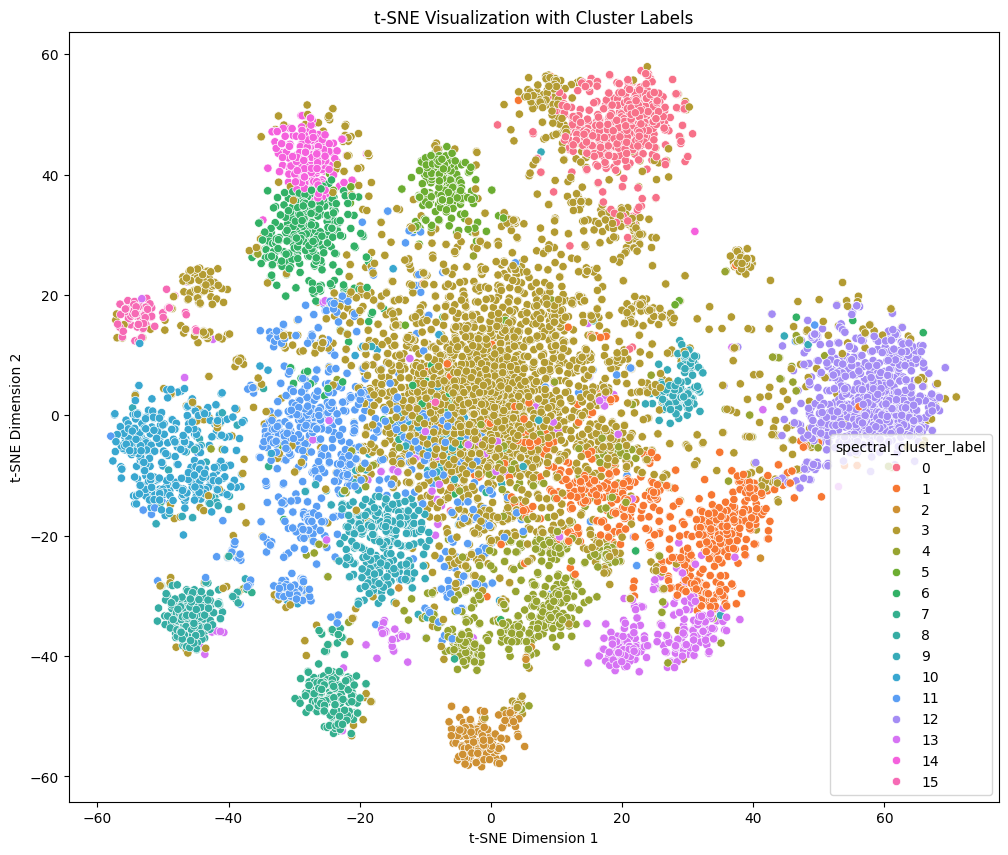

In [17]:
# Выполнение кластеризации и получение меток
spectral_cluster_16 = SpectralClustering(n_clusters=16, random_state=42)
spectral_labels_16 = spectral_cluster_16.fit_predict(tfidf_df)

tsne_df = pd.DataFrame({
    'tsne_1': data_tsne[:, 0],
    'tsne_2': data_tsne[:, 1],
    'spectral_cluster_label': spectral_labels_16
})

custom_palette = sns.color_palette("husl", 16)

plt.figure(figsize=(12, 10))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='spectral_cluster_label', data=tsne_df, palette=custom_palette, legend='full')
plt.title('t-SNE Visualization with Cluster Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


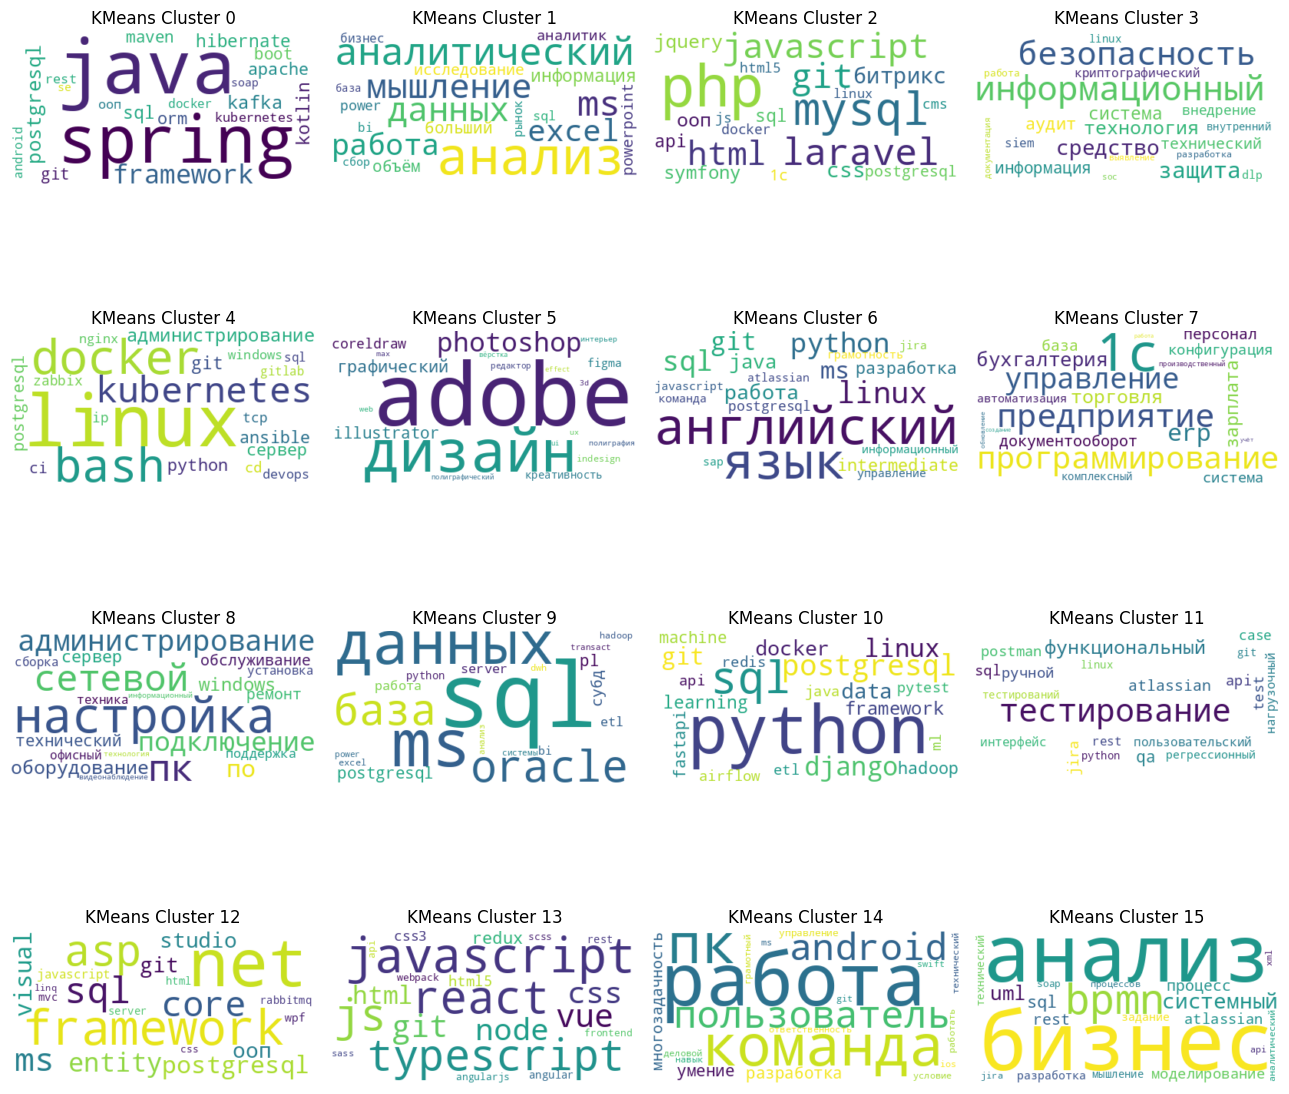

In [18]:
# Берём метки и получаем облака слов для каждой кластеризации
cluster_df_KM = pd.DataFrame(tfidf_df, columns=tfidf_df.columns)
cluster_df_KM['kmeans_cluster_label'] = kmeans_labels_16

cluster_labels = sorted(cluster_df_KM['kmeans_cluster_label'].unique())
num_clusters = len(cluster_labels)
num_cols = 4
num_rows = ceil(num_clusters / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))

for i, cluster_label in enumerate(cluster_labels):
    row_idx = i // num_cols
    col_idx = i % num_cols

    cluster_data = cluster_df_KM[cluster_df_KM['kmeans_cluster_label'] == cluster_label]
    cluster_terms = cluster_data.drop('kmeans_cluster_label', axis=1).mean()
    top_terms = cluster_terms.sort_values(ascending=False).head(20)  # Получаем термины и их веса для кластера

    terms_weights = {term: weight for term, weight in zip(top_terms.index, top_terms.values)}  # Словарь терминов и их весов

    wordcloud = WordCloud(width=400, height=200, background_color='white', collocations=False, max_words=20).generate_from_frequencies(terms_weights)

    axes[row_idx, col_idx].imshow(wordcloud, interpolation='bilinear')
    axes[row_idx, col_idx].set_title(f'KMeans Cluster {cluster_label}')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()


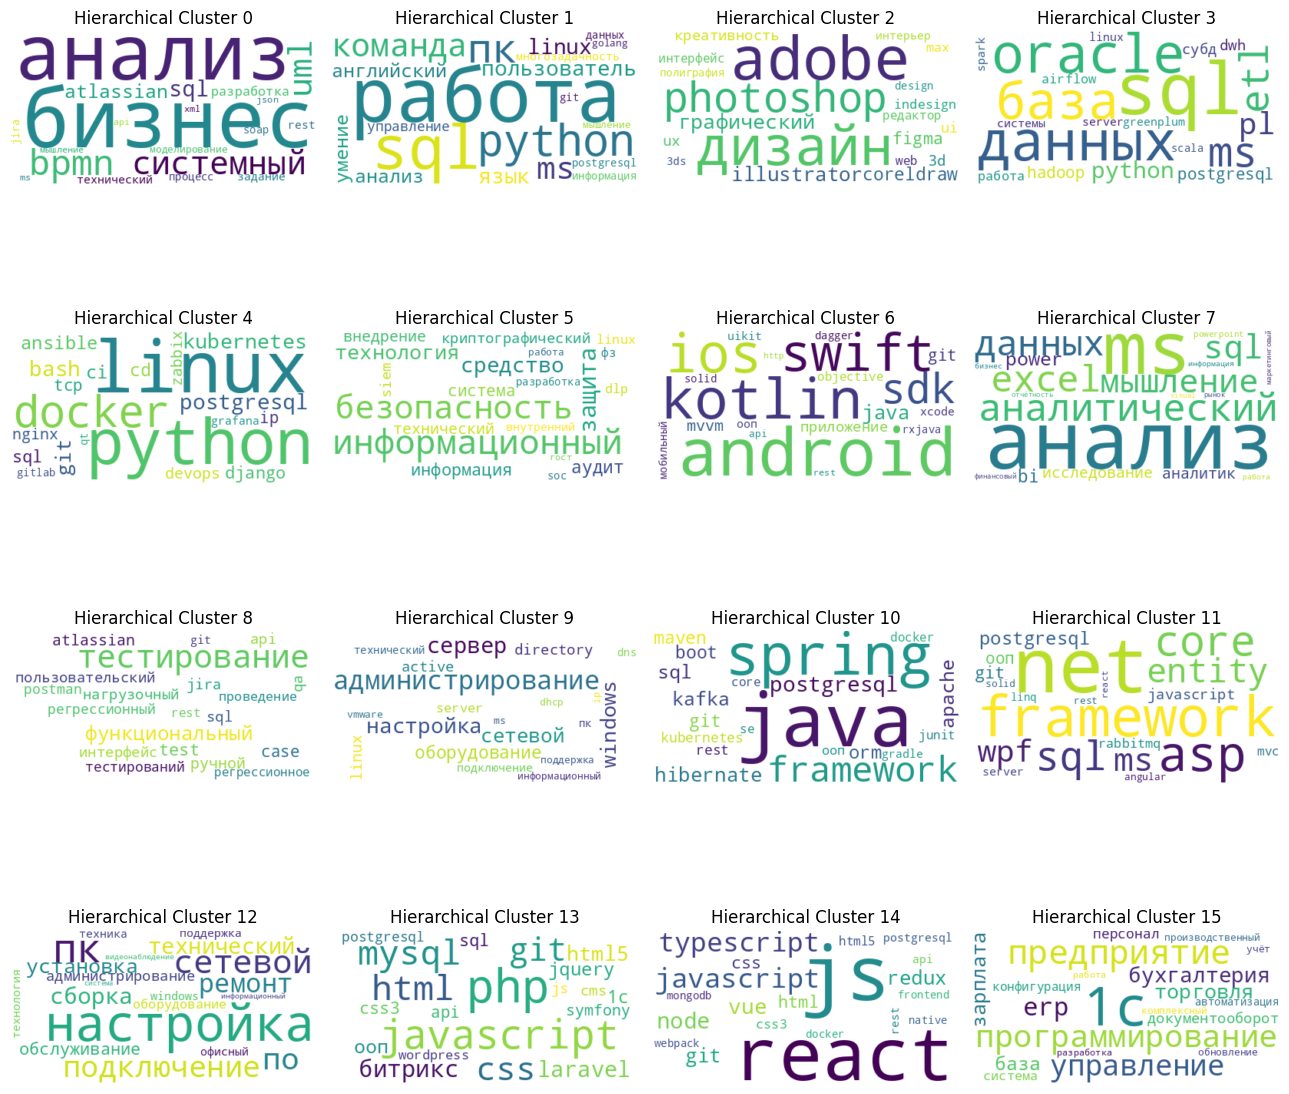

In [19]:
# Берём метки и получаем облака слов для каждой кластеризации
cluster_df_HC = pd.DataFrame(tfidf_df, columns=tfidf_df.columns)
cluster_df_HC['hierarchical_cluster_label'] = hierarchical_labels_16

cluster_labels = sorted(cluster_df_HC['hierarchical_cluster_label'].unique())
num_clusters = len(cluster_labels)
num_cols = 4
num_rows = ceil(num_clusters / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))

for i, cluster_label in enumerate(cluster_labels):
    row_idx = i // num_cols
    col_idx = i % num_cols

    cluster_data = cluster_df_HC[cluster_df_HC['hierarchical_cluster_label'] == cluster_label]
    cluster_terms = cluster_data.drop('hierarchical_cluster_label', axis=1).mean()
    top_terms = cluster_terms.sort_values(ascending=False).head(20)

    terms_weights = {term: weight for term, weight in zip(top_terms.index, top_terms.values)}

    wordcloud = WordCloud(width=400, height=200, background_color='white', collocations=False, max_words=20).generate_from_frequencies(terms_weights)

    axes[row_idx, col_idx].imshow(wordcloud, interpolation='bilinear')
    axes[row_idx, col_idx].set_title(f'Hierarchical Cluster {cluster_label}')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()


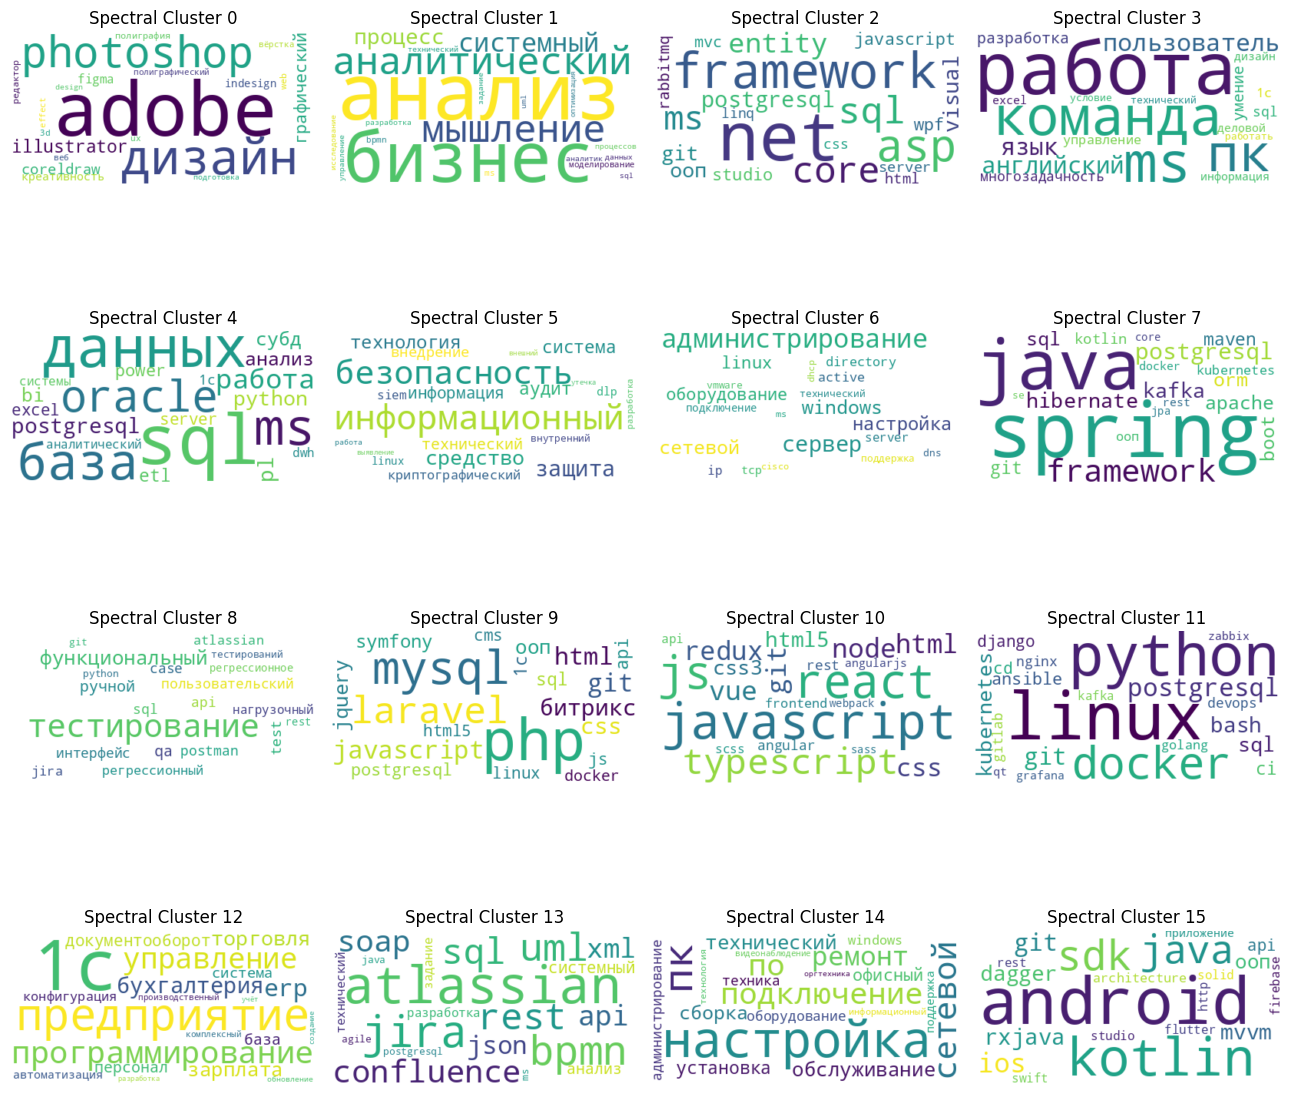

In [20]:
# Берём метки и получаем облака слов для каждой кластеризации
cluster_df_SC = pd.DataFrame(tfidf_df, columns=tfidf_df.columns)
cluster_df_SC['spectral_cluster_label'] = spectral_labels_16

cluster_labels = sorted(cluster_df_SC['spectral_cluster_label'].unique())
num_clusters = len(cluster_labels)
num_cols = 4
num_rows = ceil(num_clusters / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 13))

for i, cluster_label in enumerate(cluster_labels):
    row_idx = i // num_cols
    col_idx = i % num_cols

    cluster_data = cluster_df_SC[cluster_df_SC['spectral_cluster_label'] == cluster_label]
    cluster_terms = cluster_data.drop('spectral_cluster_label', axis=1).mean()
    top_terms = cluster_terms.sort_values(ascending=False).head(20)

    terms_weights = {term: weight for term, weight in zip(top_terms.index, top_terms.values)}

    wordcloud = WordCloud(width=400, height=200, background_color='white', collocations=False, max_words=20).generate_from_frequencies(terms_weights)

    axes[row_idx, col_idx].imshow(wordcloud, interpolation='bilinear')
    axes[row_idx, col_idx].set_title(f'Spectral Cluster {cluster_label}')
    axes[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()
